# Ejercicios

## Pregunta 1
Crear dataframes con la información de los siguientes ficheros. 

El contenido y el formato de los ficheros no se puede modificar.

* Dataframe operations : `details.xlsx`
  Contiene información acerca de préstamos bancarios concedidos a sus clientes.
  * `loan_id`: identificador del préstamo
  * `client`: código del cliente
  * `loan_amnt`: importe del préstamo
  * `term`: plazo del préstamo
  * `int_rate` : tasa de interés
  * `installment`: gastos de gestión del préstamo
  * `loan_status`: estado en el que se encuentra el préstamo
  * `purpose`: finalidad del préstamo
  * `date_of_application`: fecha de solicitud 
  * `last_pymnt_amnt`: importe del último recibo
  * `application_type`: tipo de solicitud
  
  
* Dataframe clientes : `clients.csv`   Contiene información de los clientes. Observa que la extensión del fichero es csv.
    
    * `Client_name`: código del cliente
    * `grade`: nivel de estudios
    * `emp_title`: profesión del clietne
    * `emp_length`: antigüedad en la empresa
    * `home_ownership`: indicador de si el cliente tiene casa en propiedad
    * `annual_inc`: ingresos brutos anuales
    * `addr_state`: estado en el que reside el cliente



In [1]:
import pandas as pd

In [5]:
# Sol:

detalles = pd.read_excel('datos/details.xlsx')
detalles
detalles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_id              3245 non-null   int64         
 1   client               3245 non-null   int64         
 2   loan_amnt            3245 non-null   int64         
 3   term                 3245 non-null   object        
 4   int_rate             3245 non-null   float64       
 5   installment          3245 non-null   float64       
 6   loan_status          3245 non-null   object        
 7   purpose              3245 non-null   object        
 8   date_of_application  3245 non-null   datetime64[ns]
 9   last_pymnt_amnt      3245 non-null   float64       
 10  application_type     3245 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 279.0+ KB


In [6]:
detalles.shape

(3245, 11)

In [7]:
detalles.columns

Index(['loan_id', 'client', 'loan_amnt', 'term', 'int_rate', 'installment',
       'loan_status', 'purpose', 'date_of_application', 'last_pymnt_amnt',
       'application_type'],
      dtype='object')

In [9]:
clientes = pd.read_csv('datos/clients.csv')
clientes

,Client_name,grade,emp_title,emp_length,home_ownership,annual_inc,addr_state
0,64972117,C,Research Specialist,10+ years,RENT,80000.0,OH
1,46666131,D,Assistant manager,< 1 year,RENT,31500.0,CA
2,66473639,C,Office Manager,8 years,MORTGAGE,45000.0,CT
3,28500374,C,pvd operator,5 years,MORTGAGE,40000.0,MI
4,996162,B,Safebit Solutions Inc,5 years,RENT,75000.0,TX
...,...,...,...,...,...,...,...
3236,53632438,B,guard,4 years,RENT,60000.0,CA
3237,17773104,B,Financial Analyst,2 years,MORTGAGE,85000.0,AK
3238,11957868,B,Associate Professor,< 1 year,MORTGAGE,155000.0,MA
3239,18194317,E,Technician,9 years,RENT,50000.0,CA


## Pregunta 2.
La columna `loan_status` recoge el estado del préstamo bancario. Muestra los distintos estados disponibles. Puedes usar la operación `unique()`.

In [11]:
# SOl:

detalles['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'Does not meet the credit policy. Status:Charged Off', 'Issued',
       'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Default'], dtype=object)

In [13]:
tipos = detalles['loan_status'].value_counts()

In [14]:
import matplotlib.pyplot as plt

<Axes: ylabel='loan_status'>

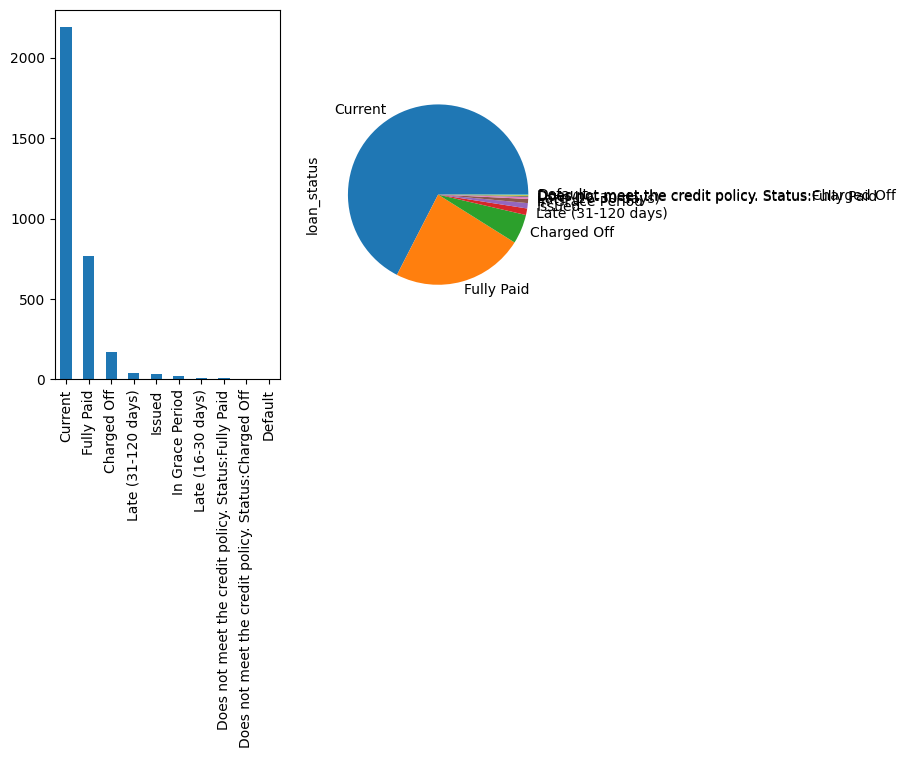

In [18]:
figura,(g1,g2) = plt.subplots(1,2)
tipos.plot(ax=g1, kind='bar')
tipos.plot(ax=g2, kind='pie')

## Pregunta 3.
La columna `loan_amnt` recoge el importe del préstamo. ¿Cuántos préstamos tienen un importe superior a 25000?

In [23]:
# SOL:

filtro_1 = detalles.loan_amnt > 25000
importe_25 = detalles[filtro_1]
len(importe_25)

363

In [24]:
importe_25.shape

(363, 11)

## Pregunta 4.
El tipo de interés asociado a los préstamos se recoge en la columna `int_rate`. Crear un nuevo dataframe con la información de los préstamos cuyo tipo de interés sea inferior al 10%. Muestra las 10 primeras filas del dataframe recién creado.

In [27]:
# SOL:

filtro_2 = detalles.int_rate < 10
interes_10 = detalles[filtro_2]
interes_10.head(10)

,loan_id,client,loan_amnt,term,int_rate,installment,loan_status,purpose,date_of_application,last_pymnt_amnt,application_type
11,54668513,58239238,12000,60 months,8.18,244.36,Current,credit_card,2004-10-01,244.36,INDIVIDUAL
13,39559617,42383345,11000,36 months,9.49,352.32,Current,debt_consolidation,1992-08-01,352.32,INDIVIDUAL
24,66405553,71131411,24000,36 months,7.26,743.91,Current,credit_card,2005-12-01,743.91,INDIVIDUAL
25,38221249,41004969,10000,36 months,7.49,311.02,Current,home,1988-10-01,311.02,INDIVIDUAL
26,7093880,8755368,24000,36 months,6.03,730.46,Current,debt_consolidation,1994-12-01,730.46,INDIVIDUAL
27,56662682,60344412,10000,36 months,7.26,309.97,Current,credit_card,1997-11-01,309.97,INDIVIDUAL
30,61468191,65586907,8000,36 months,8.18,251.36,Current,debt_consolidation,1996-07-01,251.36,INDIVIDUAL
31,60556088,64576836,25000,60 months,7.89,505.60,Current,debt_consolidation,1981-02-01,505.60,INDIVIDUAL
38,55390998,58992736,10000,36 months,8.18,314.20,Current,debt_consolidation,2000-11-01,314.20,INDIVIDUAL
41,9877739,11729587,8400,36 months,6.03,255.66,Fully Paid,credit_card,2006-03-01,5573.11,INDIVIDUAL


In [28]:
interes_10.tail(10)

,loan_id,client,loan_amnt,term,int_rate,installment,loan_status,purpose,date_of_application,last_pymnt_amnt,application_type
3219,54238544,57789263,10000,36 months,8.18,314.20,Current,debt_consolidation,1997-04-01,314.20,INDIVIDUAL
3220,35793422,38498855,26000,36 months,6.49,796.76,Current,debt_consolidation,1991-08-01,796.76,INDIVIDUAL
3222,26320592,28793213,16900,60 months,9.17,352.22,Fully Paid,debt_consolidation,2005-02-01,14535.36,INDIVIDUAL
3224,65706112,70338926,20000,36 months,8.18,628.39,Current,credit_card,2005-03-01,628.39,INDIVIDUAL
3226,58411165,62229901,33600,36 months,9.99,1084.02,Current,credit_card,1969-12-01,1084.02,INDIVIDUAL
3227,8980260,10781976,6000,36 months,8.90,190.52,Fully Paid,debt_consolidation,1989-09-01,2383.17,INDIVIDUAL
3229,65826072,70458887,5000,36 months,7.89,156.43,Current,home,1998-06-01,156.43,INDIVIDUAL
3232,63568699,67958432,13000,36 months,9.99,419.42,Current,credit_card,2003-07-01,419.42,INDIVIDUAL
3236,55220096,58790875,14000,36 months,9.17,446.31,Current,credit_card,2004-09-01,446.31,INDIVIDUAL
3237,16383222,18565649,18000,36 months,7.69,561.49,Fully Paid,debt_consolidation,2000-08-01,14468.44,INDIVIDUAL


In [29]:
# PRESTAMOS CON INTERÉS MENOR QUE 10 CUYO IMPORTE PRESTADO SEA MAYOR QUE 25000

t = detalles[filtro_1 & filtro_2]
t

,loan_id,client,loan_amnt,term,int_rate,installment,loan_status,purpose,date_of_application,last_pymnt_amnt,application_type
43,7372571,9034455,28000,36 months,8.60,885.19,Current,debt_consolidation,1978-10-01,885.19,INDIVIDUAL
58,34303737,36967111,28000,36 months,7.49,870.85,Current,credit_card,1994-06-01,870.85,INDIVIDUAL
99,10160472,12012051,28000,36 months,8.90,889.09,Fully Paid,debt_consolidation,2001-09-01,23294.08,INDIVIDUAL
112,1173971,1415586,35000,36 months,9.76,1125.42,Fully Paid,other,1995-10-01,3731.47,INDIVIDUAL
138,55340244,58941959,33000,36 months,8.18,1036.85,Current,credit_card,1986-04-01,1036.85,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
2976,66074360,70769074,30000,36 months,9.76,964.64,Current,debt_consolidation,1994-09-01,964.64,INDIVIDUAL
3008,61364212,65483070,30000,36 months,7.89,938.57,Current,credit_card,1999-01-01,938.57,INDIVIDUAL
3065,63938976,68369764,35000,36 months,9.99,1129.19,Current,credit_card,1984-09-01,1129.19,INDIVIDUAL
3220,35793422,38498855,26000,36 months,6.49,796.76,Current,debt_consolidation,1991-08-01,796.76,INDIVIDUAL


## Pregunta 5.
La columna `term` indica el plazo del préstamo y la columna `loan_amnt` recoge el importe del préstamo. Calcula el importe medio de los préstamos a 36 meses cuya finalidad es `home`. La finalidad del préstamo se recoge en la columna `purpose`. 


In [36]:
# SOL:

filtro_36 = detalles.term == '36 months'
filtro_finalidad = detalles.purpose == 'home'

t2 = detalles[filtro_36 & filtro_finalidad]
t2

t2['loan_amnt'].mean().round(2)

11365.19

In [31]:
detalles.purpose

0       debt_consolidation
1       debt_consolidation
2              credit_card
3       debt_consolidation
4       debt_consolidation
               ...        
3240           credit_card
3241                  home
3242    debt_consolidation
3243    debt_consolidation
3244    debt_consolidation
Name: purpose, Length: 3245, dtype: object

## Pregunta 6.
La columna `loan_amnt` recoge el importe del préstamo, mientras que el tipo de interés asociado a los préstamos se recoge en la columna `int_rate`. Ordenar los datos de los préstamos en orden creciente de tipo de interés y decreciente de importe del préstamo.

In [38]:
# SOL:

detalles.sort_values(['loan_amnt','int_rate'], ascending=[True, False])

,loan_id,client,loan_amnt,term,int_rate,installment,loan_status,purpose,date_of_application,last_pymnt_amnt,application_type
1665,7374909,9037052,1000,36 months,19.20,36.76,Fully Paid,other,2000-11-01,530.02,INDIVIDUAL
1126,42314985,45291781,1000,36 months,17.86,36.09,Late (31-120 days),other,2008-04-01,40.00,INDIVIDUAL
788,1567631,1834667,1000,36 months,15.31,34.82,Fully Paid,other,2005-10-01,103.64,INDIVIDUAL
1399,21921195,24244122,1000,36 months,14.99,34.67,Current,other,2002-08-01,34.67,INDIVIDUAL
1020,43661172,46677960,1000,36 months,13.99,34.18,Current,other,2011-08-01,34.18,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
2429,26259821,28732581,35000,36 months,8.39,1103.09,Current,credit_card,1993-04-01,1103.09,INDIVIDUAL
380,57793160,61545909,35000,36 months,7.89,1095.00,Current,credit_card,2000-09-01,1095.00,INDIVIDUAL
769,51957861,55387616,35000,36 months,7.89,1095.00,Current,credit_card,1978-05-01,1095.00,INDIVIDUAL
2092,67399062,72210842,35000,36 months,7.89,1095.00,Current,home,1995-06-01,0.00,INDIVIDUAL


## Pregunta 7.
La columna `home_ownership` recoge información del tipo de propiedad del cliente. Modifica el valor de dicha columna para que recoja el valor `Bajo Riesgo`  en caso de `RENT`, y el valor `Alto Riesgo` en caso de `MORTGAGE`. 

In [41]:
# SOL:

clientes['riesgo']=clientes['home_ownership'].map(lambda valor : 'Bajo riesgo' if valor == 'RENT' else 'Alto Riesgo' if valor == 'MORTGAGE' else '-')
clientes

,Client_name,grade,emp_title,emp_length,home_ownership,annual_inc,addr_state,riesgo
0,64972117,C,Research Specialist,10+ years,RENT,80000.0,OH,Bajo riesgo
1,46666131,D,Assistant manager,< 1 year,RENT,31500.0,CA,Bajo riesgo
2,66473639,C,Office Manager,8 years,MORTGAGE,45000.0,CT,Alto Riesgo
3,28500374,C,pvd operator,5 years,MORTGAGE,40000.0,MI,Alto Riesgo
4,996162,B,Safebit Solutions Inc,5 years,RENT,75000.0,TX,Bajo riesgo
...,...,...,...,...,...,...,...,...
3236,53632438,B,guard,4 years,RENT,60000.0,CA,Bajo riesgo
3237,17773104,B,Financial Analyst,2 years,MORTGAGE,85000.0,AK,Alto Riesgo
3238,11957868,B,Associate Professor,< 1 year,MORTGAGE,155000.0,MA,Alto Riesgo
3239,18194317,E,Technician,9 years,RENT,50000.0,CA,Bajo riesgo


In [44]:
clientes.riesgo.value_counts()

Alto Riesgo    1632
Bajo riesgo    1293
-               316
Name: riesgo, dtype: int64

## Pregunta 8.
Calcular el máximo salario de los clientes por grado de estudios y estado de residencia. La columna `grade` indica el grado de estudios del solicitante del préstamo y la  columna `addr_state` recoge información del estado de residencia del cliente.

In [9]:
# SOL:


## Pregunta 9.
La columna `emp_title` recoge información del puesto de trabajo de cliente. Crea un nuevo dataframe con los datos de los clientes,  donde los valores `NaN`  en dicha columna se sustituyan por el valor `Rest`. Guarda el nuevo dataframe en un fichero `csv` utilizando el símbolo `;` como  separador de campos.

In [10]:
# SOL:


## Pregunta 10. 
Calcula el número de clientes con nivel de estudios `A` que han pedido un préstamo cuya finalidad es `vacation`.

In [11]:
# SOL:
